# TITANIC SURVIVAL PREDICTION

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load the data
data = pd.read_csv('tested.csv')

# Data Exploration and Preprocessing

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.shape

(418, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Handling Missing Values
# Fill missing 'Age' values with the median age of the dataset
data['Age'].fillna(data['Age'].median(), inplace=True)

In [8]:
# Calculate the mean or median value of the 'Fare' column
fare_mean = data['Fare'].mean()
#fare_median = data['Fare'].median()

# Fill the missing value with the mean or median
data['Fare'].fillna(fare_mean, inplace=True)  # or replace `fare_mean` with `fare_median`

In [9]:
# Drop any remaining rows with missing values
data = data.drop(columns = 'Cabin', axis = 1)

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [11]:
data.shape

(418, 11)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

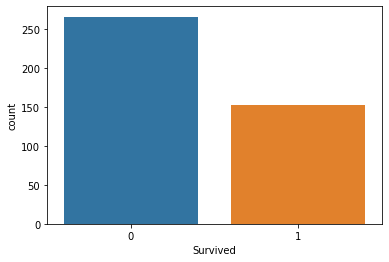

In [16]:
# Data Visualization
sns.countplot(x='Survived', data=data)  
plt.show()

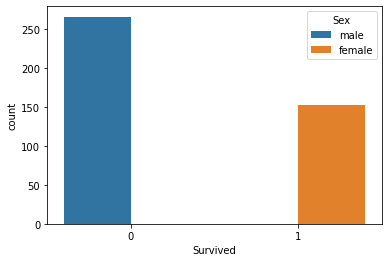

In [17]:
sns.countplot(x='Survived', hue='Sex', data=data)  
plt.show()

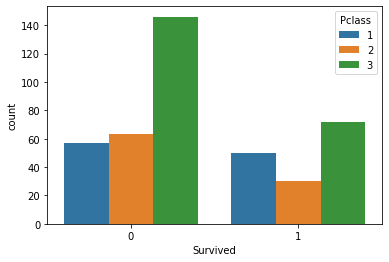

In [18]:
sns.countplot(x='Survived', hue='Pclass', data=data)  
plt.show()

# Feature Selection

In [19]:
# Split the data into features (X) and target (y)
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]
Y = data['Survived']

In [20]:
# Convert categorical variables 'Sex' and 'Embarked' into numerical form (one-hot encoding)
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [21]:
print(X)

     Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  Embarked_S
0         3  34.5      0      0    7.8292         1           1           0
1         3  47.0      1      0    7.0000         0           0           1
2         2  62.0      0      0    9.6875         1           1           0
3         3  27.0      0      0    8.6625         1           0           1
4         3  22.0      1      1   12.2875         0           0           1
..      ...   ...    ...    ...       ...       ...         ...         ...
413       3  27.0      0      0    8.0500         1           0           1
414       1  39.0      0      0  108.9000         0           0           0
415       3  38.5      0      0    7.2500         1           0           1
416       3  27.0      0      0    8.0500         1           0           1
417       3  27.0      1      1   22.3583         1           0           0

[418 rows x 8 columns]


In [22]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


# Data Splitting

In [23]:
# Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model Selection

In [24]:
# Model Selection
model = LogisticRegression(max_iter=140)

# Model Training

In [25]:
# Model Training
model.fit(X_train, y_train)

LogisticRegression(max_iter=140)

# Model Evaluation

In [26]:
# Model Evaluation
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print('Validation Accuracy:', accuracy)

Validation Accuracy: 1.0


# Model Prediction

In [27]:
# Predicting Survival Data
test_predictions = model.predict(X)

In [28]:
# Displaying the Predictions
for passenger_id, prediction in zip(data['PassengerId'], test_predictions):
    print(f"Passenger {passenger_id}: {'Survived' if prediction == 1 else 'Did not survive'}")

Passenger 892: Did not survive
Passenger 893: Survived
Passenger 894: Did not survive
Passenger 895: Did not survive
Passenger 896: Survived
Passenger 897: Did not survive
Passenger 898: Survived
Passenger 899: Did not survive
Passenger 900: Survived
Passenger 901: Did not survive
Passenger 902: Did not survive
Passenger 903: Did not survive
Passenger 904: Survived
Passenger 905: Did not survive
Passenger 906: Survived
Passenger 907: Survived
Passenger 908: Did not survive
Passenger 909: Did not survive
Passenger 910: Survived
Passenger 911: Survived
Passenger 912: Did not survive
Passenger 913: Did not survive
Passenger 914: Survived
Passenger 915: Did not survive
Passenger 916: Survived
Passenger 917: Did not survive
Passenger 918: Survived
Passenger 919: Did not survive
Passenger 920: Did not survive
Passenger 921: Did not survive
Passenger 922: Did not survive
Passenger 923: Did not survive
Passenger 924: Survived
Passenger 925: Survived
Passenger 926: Did not survive
Passenger 927